<a href="https://colab.research.google.com/github/MeryemSulkhayeva/MeryemSulkhayeva/blob/main/deep_computer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

(-0.5, 639.5, 426.5, -0.5)

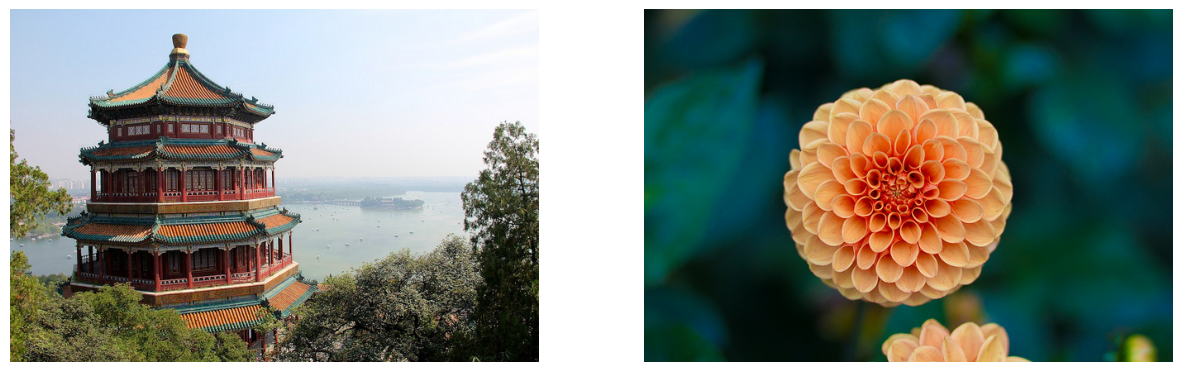

In [ ]:
images = load_sample_images()['images']
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')
# 211,212-asagi duzulur

(-0.5, 119.5, 69.5, -0.5)

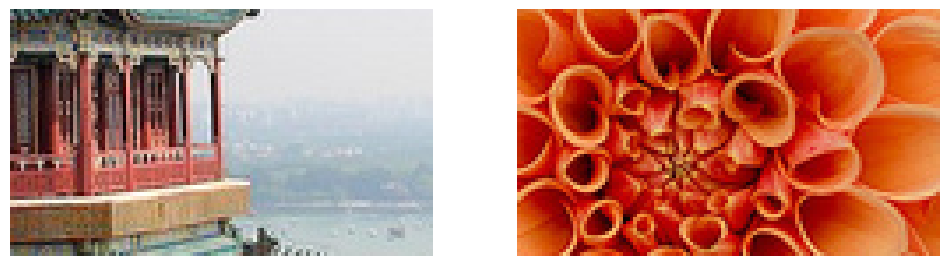

In [ ]:
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)    #Zoom
images = tf.keras.layers.Rescaling(scale=1/ 255)(images)
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(images[1])
plt.axis('off')

In [ ]:
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)
# her seklin 32 layerini yarat

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

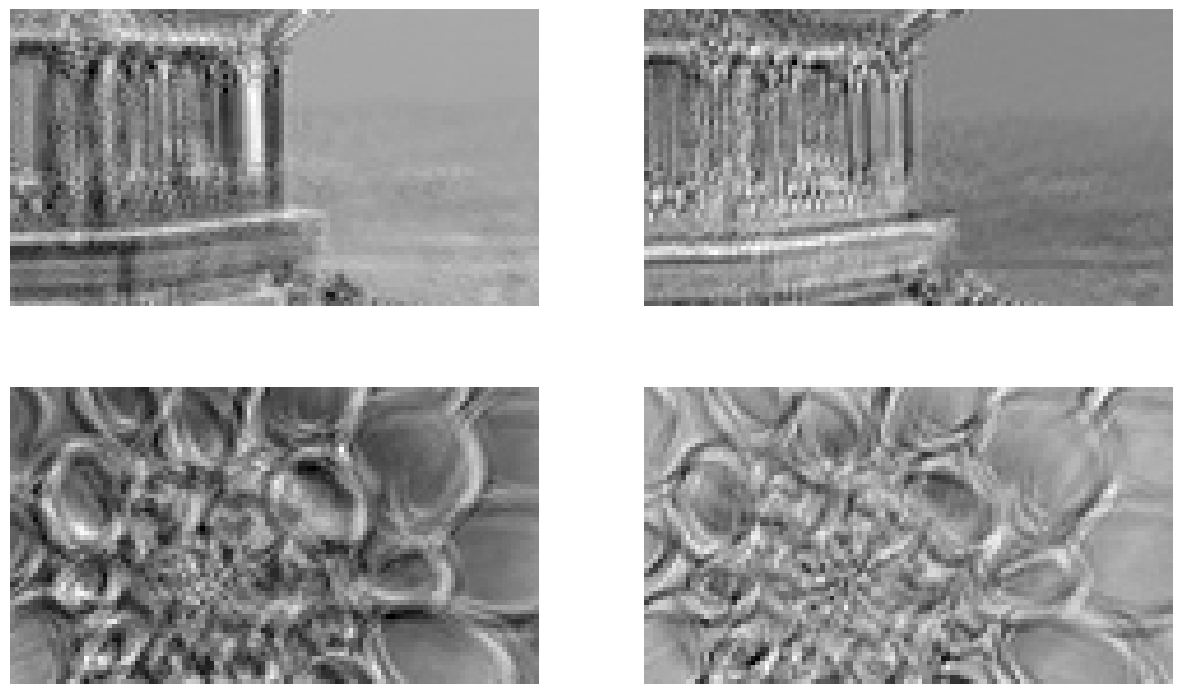

In [ ]:
# filter-onemli yerleri on plana cixarir
plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
  for fmap_idx in (0, 1):       #her sekil ucun 2 feature map yarat
    plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
    plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap='gray') #:: 64,114 ile hamisini qaytar
    plt.axis('off')
plt.show()

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                   padding='same')
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding='same',
                                    strides=2)       #strides 2 addim atmaqdi
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [ ]:
import numpy as np

def conv_output_size(input_size, kernel_size, strides=1, padding="valid"):
    if padding=="valid":
        z = input_size - kernel_size + strides
        output_size = z // strides
        num_ignored = z % strides
        return output_size, num_ignored
    else:
        output_size = (input_size - 1) // strides + 1
        num_padded = (output_size - 1) * strides + kernel_size - input_size
        return output_size, num_padded

conv_output_size(np.array([70, 120]), kernel_size=10, strides=4, padding="same")

(array([18, 30]), array([8, 6]))

In [ ]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [ ]:
tf.random.set_seed(42)
filters = tf.random.normal([7, 7, 3, 2])
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images, filters, strides=1, padding='SAME') + biases

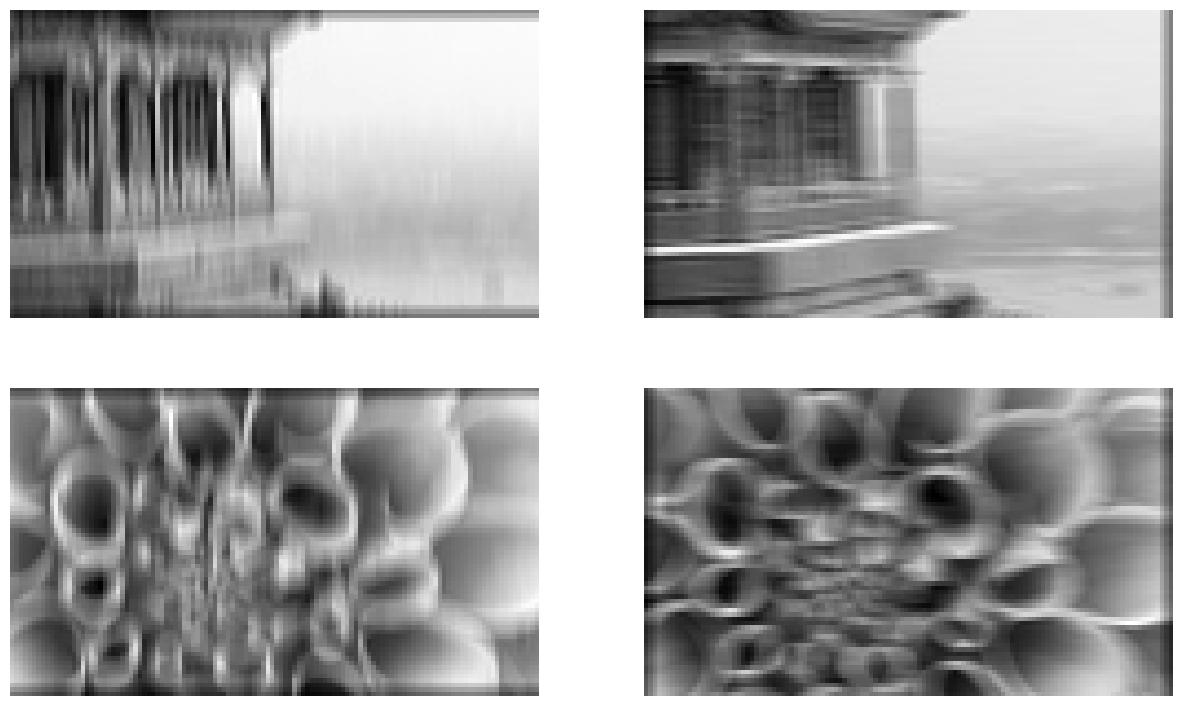

In [ ]:
# oz filterlerimizi yaradiriq
plt.figure(figsize=(15,9))
filters = np.zeros([7, 7, 3, 2])
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
fmaps = tf.nn.conv2d(images, filters, strides=1, padding='SAME') + biases
#nn de oz filterlerimizi yaradib gondere bilirik

for image_idx in (0, 1):
  for fmap_idx in (0, 1):
    plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
    plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap='gray')
    plt.axis('off')

plt.show()

#Max Pooling

In [ ]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output = max_pool(images)

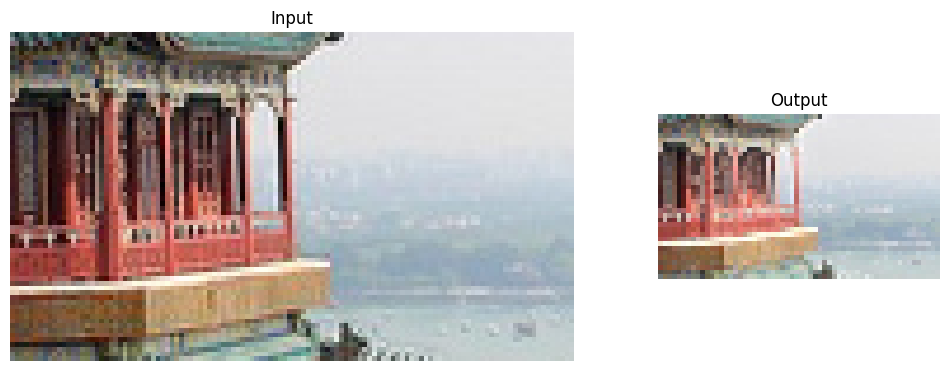

In [ ]:
import matplotlib as mpl

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])
# gridspec - 1in olcusunu digerinden balaca gostermek istesek ist olunur
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Input')
ax1.imshow(images[0])                 #plot the 1st image
ax1.axis('off')
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Output')
ax2.imshow(output[0])                 #plot the output for the 1st image
ax2.axis('off')
plt.show()

In [ ]:
# maxpool - x, y koordinatlari uzre isleyir, vacib olani secir
# depthpool - derinlik ile de isleyir

In [ ]:
class DepthPool(tf.keras.layers.Layer):
  def __init__(self, pool_size=2, **kwargs):
    super().__init__(**kwargs)
    self.pool_size = pool_size

  def call(self, inputs):
    shape = tf.shape(inputs)   #shpae[-1] is the number of channels
    groups = shape[-1] // self.pool_size   #number of channel groups
    new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
    return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

<function matplotlib.pyplot.show(close=None, block=None)>

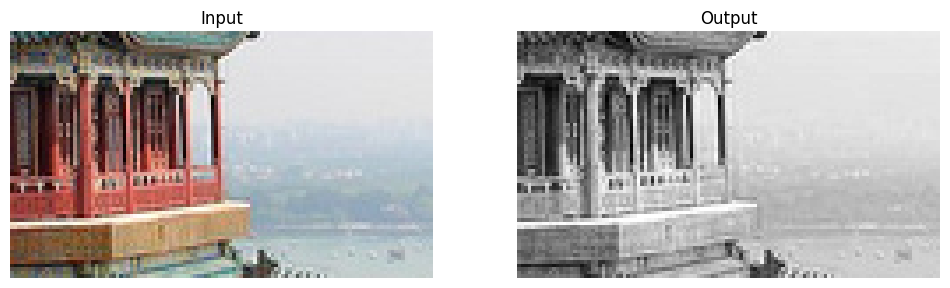

In [ ]:
depth_output = DepthPool(pool_size=3)(images)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('Input')
plt.imshow(images[0])        #plot the 1st image
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Output')
plt.imshow(depth_output[0, ..., 0], cmap='gray')  #plot 1st image's output
plt.axis('off')
plt.show

# CNN  Architectures
Tackling Fashion MNIST With a CNN

In [ ]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [ ]:
from functools import partial

tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding='same',
                       activation='relu', kernel_initializer='he_normal')
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 26s 11ms/step - loss: 0.7173 - accuracy: 0.7459 - val_loss: 0.3767 - val_accuracy: 0.8640
Epoch 2/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.4200 - accuracy: 0.8581 - val_loss: 0.3174 - val_accuracy: 0.8816
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3490 - accuracy: 0.8824 - val_loss: 0.3283 - val_accuracy: 0.8900
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3127 - accuracy: 0.8938 - val_loss: 0.2735 - val_accuracy: 0.8994
Epoch 5/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2879 - accuracy: 0.9011 - val_loss: 0.2625 - val_accuracy: 0.9004
Epoch 6/10
1719/1719 [==============================] - 25s 14ms/step - loss: 0.2652 - accuracy: 0.9109 - val_loss: 0.2695 - val_accuracy: 0.9072
Epoch 7/10
1719/1719 [==============================] - 23s 14ms/step - loss: 0.2497 - accuracy: 0.9150 - val_loss: 0.2500 - 

#Implementing a ResNet-34 CNN Using Keras

In [ ]:
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding='same', kernel_initializer='he_normal', use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):      #wide dan ist edir, kuncleri tapir
  def __init__(self, filters, strides=1, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.activation = tf.keras.activations.get(activation)
    self.main_layers = [
        DefaultConv2D(filters, strides=strides),
        tf.keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        tf.keras.layers.BatchNormalization()
    ]
    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
          DefaultConv2D(filters, kernel_size=1, strides=strides),
          tf.keras.layers.BatchNormalization()
      ]

    def call(self, inputs):
      Z = inputs
      for layer in self.main_layers:
        Z = layer(Z)
      skip_Z = inputs
      for layer in self.skip_layers:
        skip_Z = layer(skip_Z)
      return self.activation(Z + skip_Z)

In [ ]:
model = tf.keras.Sequential([
    DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[224, 224, 3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same'),
])
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
  strides = 1 if filters == prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters = filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Using Pretrained Models from Keras

In [ ]:
model = tf.keras.applications.ResNet50(weights='imagenet')

In [ ]:
images = load_sample_images()['images']
images_resized = tf.keras.layers.Resizing(height=224, width=224,
                                          crop_to_aspect_ratio=True)(images)

In [ ]:
inputs = tf.keras.applications.resnet50.preprocess_input(images_resized)
# preprocess_input-datani gotur preprocess ele

In [ ]:
Y_proba = model.predict(inputs)
Y_proba.shape

1/1 [==============================] - 1s 1s/step


(2, 1000)

In [ ]:
top_K = tf.keras.applications.resnet.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
  print(f"Image #{image_index}")
  for class_id, name, y_proba in top_K[image_index]:
    print(f' {class_id} - {name:12s} {y_proba:.2%}')

Image #0
 n03877845 - palace       54.69%
 n03781244 - monastery    24.71%
 n02825657 - bell_cote    18.55%
Image #1
 n04522168 - vase         32.67%
 n11939491 - daisy        17.82%
 n03530642 - honeycomb    12.04%


In [ ]:
Y_proba

array([[6.8857524e-09, 5.6761703e-08, 2.5574941e-08, ..., 3.1393503e-09,
        8.6936929e-08, 5.2958914e-08],
       [6.9638489e-08, 1.6412818e-05, 1.3508698e-07, ..., 2.5592428e-05,
        7.3730836e-05, 1.4076024e-04]], dtype=float32)

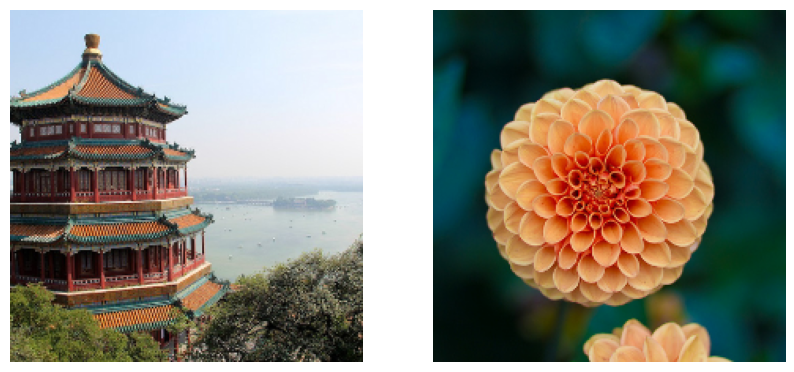

In [ ]:
# Extra code - Displays the cropped and resized images-kenarlarini kesirik
plt.figure(figsize=(10, 6))
for idx in (0,1):
  plt.subplot(1, 2, idx + 1)
  plt.imshow(images_resized[idx] / 255.)
  plt.axis('off')

plt.show()

#Pretrained

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

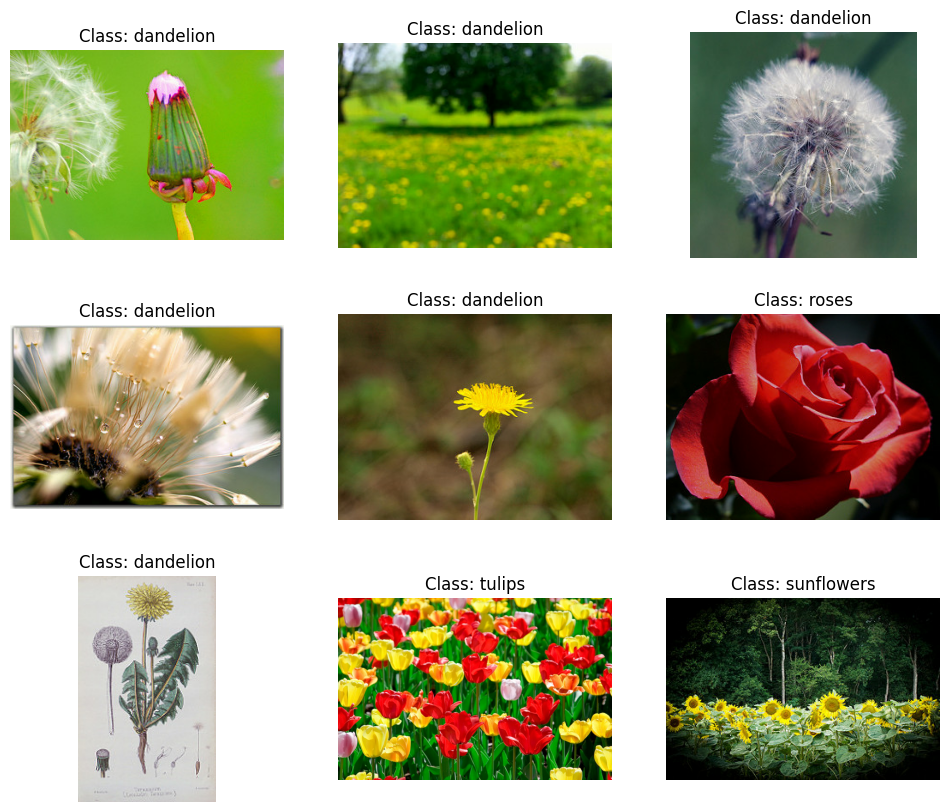

In [ ]:
plt.figure(figsize=(12, 10))
index=0
for image, label in valid_set_raw.take(9):
  index += 1
  plt.subplot(3, 3, index)
  plt.imshow(image)
  plt.title(f'Class: {class_names[label]}')
  plt.axis('off')

plt.show()

In [ ]:
tf.keras.backend.clear_session()

batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])

train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

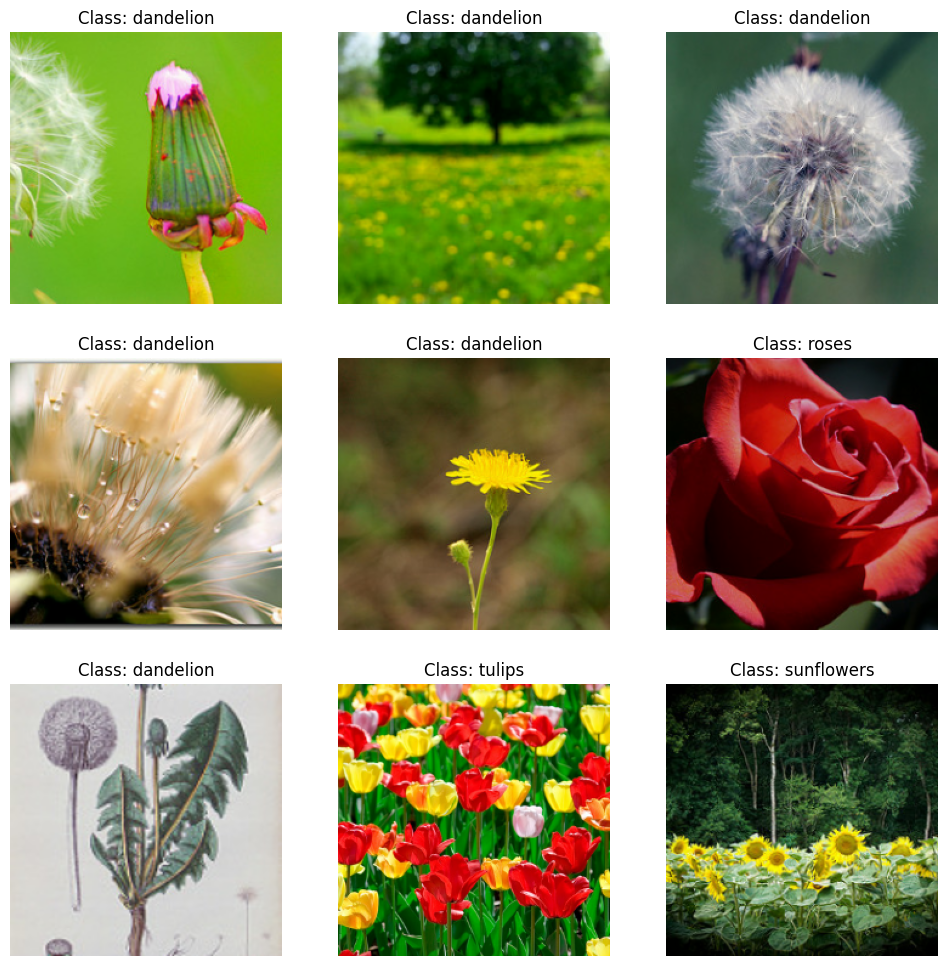

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
  for index in range(9):
    plt.subplot(3, 3, index + 1)
    plt.imshow((X_batch[index] + 1) / 2)
    plt.title(f"Class: {class_names[y_batch[index]]}")
    plt.axis("off")

plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal', seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

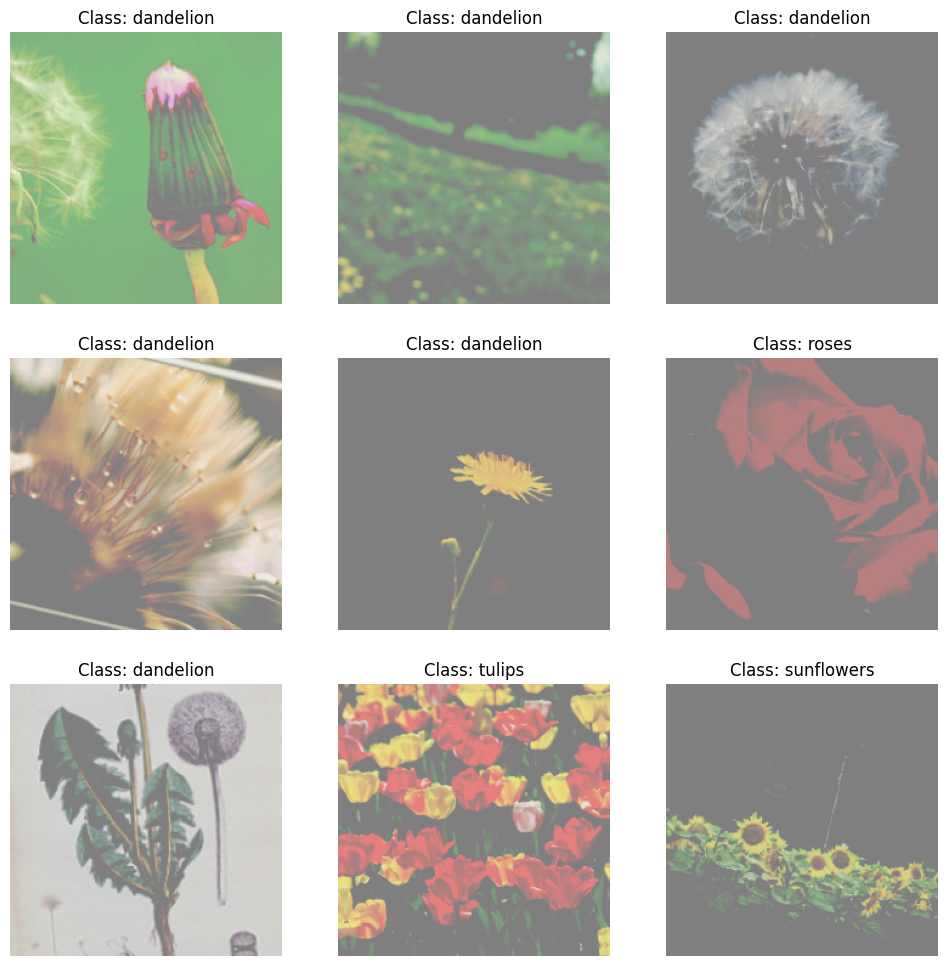

In [ ]:
plt.figure(figsize=(12,12))
for X_batch, y_batch in valid_set.take(1):
  X_batch_augmented = data_augmentation(X_batch, training=True)
  for index in range(9):
    plt.subplot(3, 3, index + 1)
    plt.imshow(np.clip((X_batch_augmented[index] + 1) / 2, 0, 1))
    plt.title(f'Class: {class_names[y_batch[index]]}')
    plt.axis('off')

plt.show()

In [ ]:
tf.random.set_seed(42)
base_model = tf.keras.applications.xception.Xception(weights='imagenet',
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation='softmax')(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
# tf.keras.layers.SeparableConv2D-conv2d den daha gucludu

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False
  # freeze all layers

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)     #momentum-bundan evvel atdigini nezere al, surtunme olur
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(train_set, validation_data=valid_set, epochs=3)

Epoch 1/3
86/86 [==============================] - 22s 170ms/step - loss: 0.7427 - accuracy: 0.8081 - val_loss: 0.6975 - val_accuracy: 0.8457
Epoch 2/3
86/86 [==============================] - 13s 144ms/step - loss: 0.3461 - accuracy: 0.9066 - val_loss: 0.6580 - val_accuracy: 0.8330
Epoch 3/3
86/86 [==============================] - 13s 145ms/step - loss: 0.1914 - accuracy: 0.9382 - val_loss: 0.7503 - val_accuracy: 0.8475


In [ ]:
for indices in zip(range(33), range(33, 66), range(66, 99),range(99,132)):
  for idx in indices:
    print(f'{idx:3}: {base_model.layers[idx].name:22}', end='')
  print()

  0: input_1                33: block4_pool            66: block8_sepconv1_act    99: block11_sepconv2_act  
  1: block1_conv1           34: batch_normalization_2  67: block8_sepconv1       100: block11_sepconv2      
  2: block1_conv1_bn        35: add_2                  68: block8_sepconv1_bn    101: block11_sepconv2_bn   
  3: block1_conv1_act       36: block5_sepconv1_act    69: block8_sepconv2_act   102: block11_sepconv3_act  
  4: block1_conv2           37: block5_sepconv1        70: block8_sepconv2       103: block11_sepconv3      
  5: block1_conv2_bn        38: block5_sepconv1_bn     71: block8_sepconv2_bn    104: block11_sepconv3_bn   
  6: block1_conv2_act       39: block5_sepconv2_act    72: block8_sepconv3_act   105: add_9                 
  7: block2_sepconv1        40: block5_sepconv2        73: block8_sepconv3       106: block12_sepconv1_act  
  8: block2_sepconv1_bn     41: block5_sepconv2_bn     74: block8_sepconv3_bn    107: block12_sepconv1      
  9: block2_sepconv

In [ ]:
print('AAA', end = '')
print('BBB')

AAABBB


In [ ]:
#Unfreeze - learning_rate asagi salinir, her defe compile olunur
for layer in base_model.layers[56:]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
               metrics=['accuracy'])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
86/86 [==============================] - 37s 301ms/step - loss: 0.3017 - accuracy: 0.9055 - val_loss: 0.4002 - val_accuracy: 0.8820
Epoch 2/10
86/86 [==============================] - 27s 301ms/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.3538 - val_accuracy: 0.9147
Epoch 3/10
86/86 [==============================] - 26s 296ms/step - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.3879 - val_accuracy: 0.9074
Epoch 4/10
86/86 [==============================] - 26s 289ms/step - loss: 0.0121 - accuracy: 0.9956 - val_loss: 0.3717 - val_accuracy: 0.9038
Epoch 5/10
86/86 [==============================] - 27s 303ms/step - loss: 0.0104 - accuracy: 0.9956 - val_loss: 0.3841 - val_accuracy: 0.8929
Epoch 6/10
86/86 [==============================] - 26s 296ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.4444 - val_accuracy: 0.8929
Epoch 7/10
86/86 [==============================] - 26s 290ms/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.3705 - val_accuracy: 0.9129

#Classification and Localization
Object Detection

In [ ]:
tf.random.set_seed(42)

base_model = tf.keras.applications.xception.Xception(weights='imagenet',
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = tf.keras.layers.Dense(n_classes, activation='softmax')(avg)    #hansi guldu tap
loc_output = tf.keras.layers.Dense(4)(avg)                                    #koordinatlari(harda yerlesir)
model = tf.keras.Model(inputs=base_model.input,
                       outputs=[class_output, loc_output])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss=['sparse_categorical_crossentropy','mse'],
              optimizer = optimizer, loss_weights=[0.8, 0.2],
              metrics=['accuracy'])
#FCN(Fully Convolutional Network - dense layer yoxdu, hamisi conv2d di, istediyi qeder output qoyur-object detectionda ist olunur

In [ ]:
def add_random_bounding_boxes(images, labels):
  fake_bboxes = tf.random.uniform([tf.shape(images)[0], 4])
  return images, (labels, fake_bboxes)

fake_train_set = train_set.take(5).repeat(2).map(add_random_bounding_boxes)
model.fit(fake_train_set, epochs=2)

Epoch 1/2
10/10 [==============================] - 22s 501ms/step - loss: 1.2965 - dense_7_loss: 1.5438 - dense_8_loss: 0.3074 - dense_7_accuracy: 0.3344 - dense_8_accuracy: 0.3063
Epoch 2/2
10/10 [==============================] - 6s 507ms/step - loss: 0.9375 - dense_7_loss: 1.1164 - dense_8_loss: 0.2216 - dense_7_accuracy: 0.6406 - dense_8_accuracy: 0.2250
